## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Load Data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/submission.csv')

## EDA

In [3]:
train

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [4]:
test

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,...,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,...,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,...,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,...,2,0,0,4,3,3,3,4,4,2


In [5]:
pd.value_counts(train['letter'])

Z    91
K    90
O    90
L    89
H    89
G    87
M    86
Y    86
U    85
Q    82
T    82
R    81
F    80
X    79
N    77
S    76
D    76
C    74
V    73
A    72
B    71
W    69
J    67
P    66
E    66
I    64
Name: letter, dtype: int64

In [6]:
X_temp = np.array(train[[str(i) for i in range(784)]][:32])
X_temp = X_temp.reshape(-1,1,28,28)
X_temp.shape

(32, 1, 28, 28)

In [7]:
train_digit = train['digit'].values
X_train_letter = train['letter'].values
X_test_letter = test['letter'].values

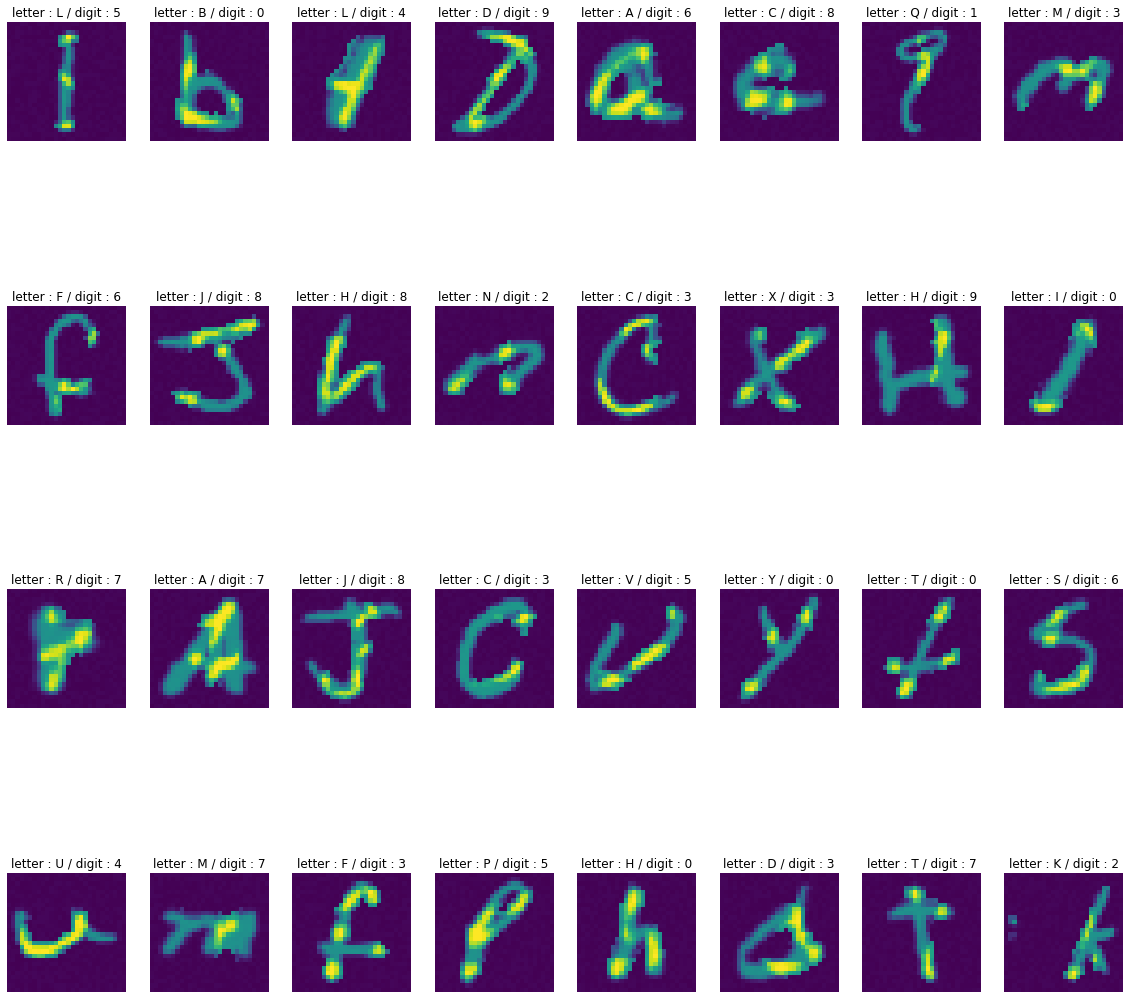

In [8]:
plt.figure(figsize=(20,20))
for idx, (image, digit, letter) in enumerate(zip(X_temp[:32], train_digit[:32] ,X_train_letter[:32])):
    plt.subplot(4,8,idx+1)
    plt.imshow(image[0])
    title = 'letter : {} / digit : {}'.format(letter, digit)
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')

## utility function

### graph

In [9]:
def plot_curve(epochs, hist, list_of_metrics):
    
    fig, ax = plt.subplots(1,2,figsize = (12, 8))
    
    for i in range(len(ax)):
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel('Value')
        
        for n in range(len(list_of_metrics)):
            if i == 0:
                y = hist[list_of_metrics[n]]
                if n == 0:
                    ax[i].plot(epochs, y, label="train")
                else:
                    ax[i].plot(epochs, y, label="val")
                ax[i].set_title('Loss')
                ax[i].legend(loc='upper right')
                if n == 1:
                    break
            else:
                if n >= 2:
                    y = hist[list_of_metrics[n]]
                    if n == 2:
                        ax[i].plot(epochs, y, label="train")
                    else:
                        ax[i].plot(epochs, y, label="val")
                    ax[i].set_title('Accuracy')
                    ax[i].legend(loc='lower right')
                    
    plt.show()

### alphabet image

In [10]:
def digit_image(x):
    return np.where(x>=150, x, 0)

### alphabet one-hot encoding

In [11]:
def alpha_one_hot(x):
    label_encoder = LabelEncoder()
    onehot_encoder = OneHotEncoder(sparse=False)
    
    integer_encoded = label_encoder.fit_transform(x)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    
    x = onehot_encoder.fit_transform(integer_encoded)
    return x

## Dataset 

In [12]:
X_train = train.drop(['letter','id','digit'],axis=1)
X_test = test.drop(['letter','id'],axis=1)

In [13]:
X_trains = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [14]:
X_trains.shape

(2048, 28, 28, 1)

In [15]:
X_test.shape

(20480, 28, 28, 1)

In [16]:
y_trains = train['digit']

In [17]:
y_trains = utils.to_categorical(y_trains, 10)

In [18]:
y_trains.shape

(2048, 10)

In [19]:
X_train_digit = digit_image(X_trains)
X_test_digit = digit_image(X_test)

In [20]:
X_train_alpha = X_trains - X_train_digit/2
X_test_alpha = X_test - X_test_digit/2

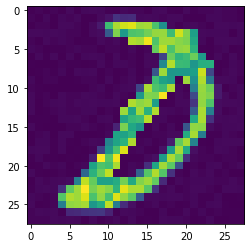

In [25]:
a = X_train_alpha[3].reshape(28,28)
plt.imshow(a)


In [21]:
X_trains = np.concatenate((X_trains, X_train_digit, X_train_alpha),axis=-1)
X_test = np.concatenate((X_test, X_test_digit, X_test_alpha),axis=-1)

In [22]:
X_trains.shape

(2048, 28, 28, 3)

In [23]:
X_test.shape

(20480, 28, 28, 3)

## Train

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Add, Input, Flatten, Dense, GlobalAveragePooling2D, Dropout, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [25]:
reduction_ratio=16

In [26]:
input_ = tf.keras.layers.Input(shape=(28,28,3))

conv1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5), kernel_initializer='he_normal', activation='elu', padding='same',
                              kernel_constraint=tf.keras.constraints.max_norm(3.))(input_) #28x28x128


## Residual Unit1
batch1_1 = tf.keras.layers.BatchNormalization()(conv1)
elu1_1 = tf.keras.layers.ELU()(batch1_1)
res1_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_1) 
batch1_2 = tf.keras.layers.BatchNormalization()(res1_1)
elu1_2 = tf.keras.layers.ELU()(batch1_2)
res1_2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_2) 
batch1_3 = tf.keras.layers.BatchNormalization()(res1_2)
elu1_3 = tf.keras.layers.ELU()(batch1_3)
res1_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_3)                          

# SEBlock1
ch_input1 = 128
ch_reduced1 = ch_input1//reduction_ratio
avpool1 = tf.keras.layers.GlobalAveragePooling2D()(res1_3)
sed1_1 = tf.keras.layers.Dense(ch_reduced1, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool1)
sed1_2 = tf.keras.layers.Dense(ch_input1, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed1_1)
reshape1 = tf.keras.layers.Reshape((1,1,ch_input1))(sed1_2)
mul1 = tf.keras.layers.Multiply()([res1_3, reshape1])
#

skip1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same')(conv1)
res1 = tf.keras.layers.Add()([mul1, skip1]) #28x28x128
##

## Residual Unit2
batch2_1 = tf.keras.layers.BatchNormalization()(res1)
elu2_1 = tf.keras.layers.ELU()(batch2_1)
res2_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_1) 
batch2_2 = tf.keras.layers.BatchNormalization()(res2_1)
elu2_2 = tf.keras.layers.ELU()(batch2_2)
res2_2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_2) 
batch2_3 = tf.keras.layers.BatchNormalization()(res2_2)
elu2_3 = tf.keras.layers.ELU()(batch2_3)
res2_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_3)                         


# SEBlock2
ch_input2 = 128
ch_reduced2 = ch_input2//reduction_ratio
avpool2 = tf.keras.layers.GlobalAveragePooling2D()(res2_3)
sed2_1 = tf.keras.layers.Dense(ch_reduced2, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool2)
sed2_2 = tf.keras.layers.Dense(ch_input2, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed2_1)
reshape2 = tf.keras.layers.Reshape((1,1,ch_input2))(sed2_2)
mul2 = tf.keras.layers.Multiply()([res2_3, reshape2])
#
skip2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same')(res1)
res2 = tf.keras.layers.Add()([mul2, skip2])
drop2 = tf.keras.layers.Dropout(0.3)(res2) # 28x28x128
##


## Residual Unit3
batch3_1 = tf.keras.layers.BatchNormalization()(drop2)
elu3_1 = tf.keras.layers.ELU()(batch3_1)
res3_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_1) 
batch3_2 = tf.keras.layers.BatchNormalization()(res3_1)
elu3_2 = tf.keras.layers.ELU()(batch3_2)
res3_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_2) 
batch3_3 = tf.keras.layers.BatchNormalization()(res3_2)
elu3_3 = tf.keras.layers.ELU()(batch3_3)
res3_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_3)                           


# SEBlock3
ch_input3 = 128
ch_reduced3 = ch_input3//reduction_ratio
avpool3 = tf.keras.layers.GlobalAveragePooling2D()(res3_3)
sed3_1 = tf.keras.layers.Dense(ch_reduced3, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool3)
sed3_2 = tf.keras.layers.Dense(ch_input3, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed3_1)
reshape3 = tf.keras.layers.Reshape((1,1,ch_input3))(sed3_2)
mul3 = tf.keras.layers.Multiply()([res3_3, reshape3])
#
skip3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1),padding='same')(drop2)
res3 = tf.keras.layers.Add()([mul3, skip3]) #28x28x128
##


## Residual Unit4
batch4_1 = tf.keras.layers.BatchNormalization()(res3)
elu4_1 = tf.keras.layers.ELU()(batch4_1)
res4_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_1) 
batch4_2 = tf.keras.layers.BatchNormalization()(res4_1)
elu4_2 = tf.keras.layers.ELU()(batch4_2)
res4_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_2) 
batch4_3 = tf.keras.layers.BatchNormalization()(res4_2)
elu4_3 = tf.keras.layers.ELU()(batch4_3)
res4_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_3)                              


# SEBlock4
ch_input4 = 256
ch_reduced4 = ch_input4//reduction_ratio
avpool4 = tf.keras.layers.GlobalAveragePooling2D()(res4_3)
sed4_1 = tf.keras.layers.Dense(ch_reduced4, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool4)
sed4_2 = tf.keras.layers.Dense(ch_input4, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed4_1)
reshape4 = tf.keras.layers.Reshape((1,1,ch_input4))(sed4_2)
mul4 = tf.keras.layers.Multiply()([res4_3, reshape4])
#
skip4 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(res3)
res4 = tf.keras.layers.Add()([mul4, skip4])
pool4 = tf.keras.layers.MaxPool2D((2,2))(res4)
drop4 = tf.keras.layers.Dropout(0.3)(pool4) # 14x14x256
##


## Residual Unit5
batch5_1 = tf.keras.layers.BatchNormalization()(drop4)
elu5_1 = tf.keras.layers.ELU()(batch5_1)
res5_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_1) 
batch5_2 = tf.keras.layers.BatchNormalization()(res5_1)
elu5_2 = tf.keras.layers.ELU()(batch5_2)
res5_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_2) 
batch5_3 = tf.keras.layers.BatchNormalization()(res5_2)
elu5_3 = tf.keras.layers.ELU()(batch5_3)
res5_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_3)                                 


# SEBlock5
ch_input5 = 256
ch_reduced5 = ch_input5//reduction_ratio
avpool5 = tf.keras.layers.GlobalAveragePooling2D()(res5_3)
sed5_1 = tf.keras.layers.Dense(ch_reduced5, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool5)
sed5_2 = tf.keras.layers.Dense(ch_input5, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed5_1)
reshape5 = tf.keras.layers.Reshape((1,1,ch_input5))(sed5_2)
mul5 = tf.keras.layers.Multiply()([res5_3, reshape5])
#
skip5 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(drop4)
res5 = tf.keras.layers.Add()([mul5, skip5])
pool5 = tf.keras.layers.MaxPool2D((2,2))(res5) #7x7x256
##


## Residual Unit6
batch6_1 = tf.keras.layers.BatchNormalization()(pool5)
elu6_1 = tf.keras.layers.ELU()(batch6_1)
res6_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_1) 
batch6_2 = tf.keras.layers.BatchNormalization()(res6_1)
elu6_2 = tf.keras.layers.ELU()(batch6_2)
res6_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_2) 
batch6_3 = tf.keras.layers.BatchNormalization()(res6_2)
elu6_3 = tf.keras.layers.ELU()(batch6_3)
res6_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_3)
# SEBlock6
ch_input6 = 256
ch_reduced6 = ch_input6//reduction_ratio
avpool6 = tf.keras.layers.GlobalAveragePooling2D()(res6_3)
sed6_1 = tf.keras.layers.Dense(ch_reduced6, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool6)
sed6_2 = tf.keras.layers.Dense(ch_input6, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed6_1)
reshape6 = tf.keras.layers.Reshape((1,1,ch_input6))(sed6_2)
mul6 = tf.keras.layers.Multiply()([res6_3, reshape6])
#
skip6 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(pool5)
res6 = tf.keras.layers.Add()([mul6, skip6])
drop6 = tf.keras.layers.Dropout(0.3)(res6) # 7x7x256
##

## Residual Unit7
batch7_1 = tf.keras.layers.BatchNormalization()(drop6)
elu7_1 = tf.keras.layers.ELU()(batch7_1)
res7_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_1) 
batch7_2 = tf.keras.layers.BatchNormalization()(res7_1)
elu7_2 = tf.keras.layers.ELU()(batch7_2)
res7_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_2) 
batch7_3 = tf.keras.layers.BatchNormalization()(res7_2)
elu7_3 = tf.keras.layers.ELU()(batch7_3)
res7_3 = tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_3)
skip7 = tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1),padding='same')(drop6)
res7 = tf.keras.layers.Add()([res7_3, skip7])
pool7 = tf.keras.layers.MaxPool2D((3,3))(res7) # 2x2x512


# flatten1 = tf.keras.layers.Flatten()(pool7)
# dense1 = tf.keras.layers.Dense(1024, activation='elu', kernel_initializer='he_normal', kernel_constraint=tf.keras.constraints.max_norm(3.))(flatten1)
gap = tf.keras.layers.GlobalAveragePooling2D()(pool7)
dense1 = tf.keras.layers.Dense(1024, activation='elu', kernel_initializer='he_normal', kernel_constraint=tf.keras.constraints.max_norm(3.))(gap)

drop10 = tf.keras.layers.Dropout(0.5)(dense1)
output = tf.keras.layers.Dense(10 ,activation='softmax')(drop10)


In [27]:
datagen = ImageDataGenerator(
#     rotation_range=30,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.5,
#     zoom_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_trains)

In [28]:
epochs=500
batch_size = 32
num_model = 10

model_1
-------------------------------------------------------------------------------------------------------------------------
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
51/51 [==============================] - 34s 671ms/step - loss: 5.1276 - accuracy: 0.1017 - val_loss: 2.8153 - val_accuracy: 0.1098 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 48ms/step - loss: 2.9029 - accuracy: 0.1482 - val_loss: 2.9595 - val_accuracy: 0.1415 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 2.8265 - accuracy: 0.1445 - val_loss: 3.2340 - val_accuracy: 0.1415 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 2.7781 - accuracy: 0.1526 - val_loss: 3.4484 - val_accuracy: 0.1195 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 2.7328 - accuracy: 0.1606 - val_loss: 3.7613 - val_accuracy: 0.1122 - lr: 0.0010
Epoch 6/500
51/51

51/51 [==============================] - 2s 42ms/step - loss: 1.5198 - accuracy: 0.4813 - val_loss: 1.3305 - val_accuracy: 0.6366 - lr: 0.0010
Epoch 52/500
51/51 [==============================] - 2s 42ms/step - loss: 1.5104 - accuracy: 0.5050 - val_loss: 0.9421 - val_accuracy: 0.6976 - lr: 0.0010
Epoch 53/500
51/51 [==============================] - 2s 48ms/step - loss: 1.5157 - accuracy: 0.4884 - val_loss: 0.7578 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 54/500
51/51 [==============================] - 2s 42ms/step - loss: 1.4566 - accuracy: 0.5143 - val_loss: 1.2246 - val_accuracy: 0.6512 - lr: 0.0010
Epoch 55/500
51/51 [==============================] - 2s 42ms/step - loss: 1.4795 - accuracy: 0.5125 - val_loss: 0.8121 - val_accuracy: 0.7244 - lr: 0.0010
Epoch 56/500
51/51 [==============================] - 2s 43ms/step - loss: 1.5262 - accuracy: 0.4981 - val_loss: 1.0496 - val_accuracy: 0.6732 - lr: 0.0010
Epoch 57/500
51/51 [==============================] - 2s 42ms/step - loss: 1.

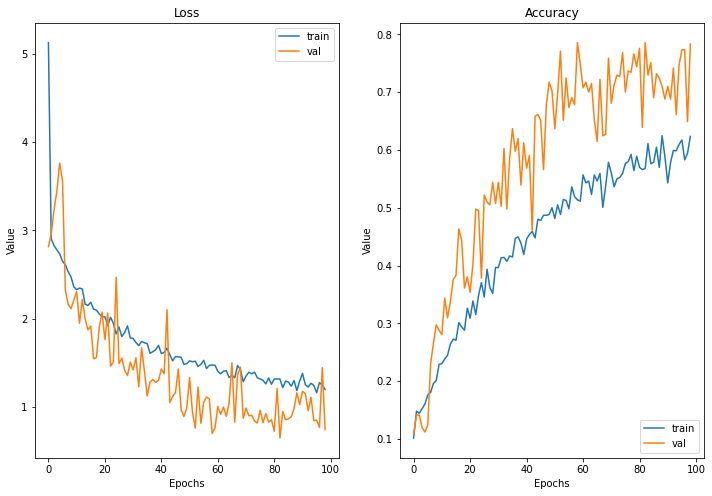

model_2
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 56ms/step - loss: 1.5274 - accuracy: 0.4988 - val_loss: 1.3039 - val_accuracy: 0.6171 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 49ms/step - loss: 1.4451 - accuracy: 0.5318 - val_loss: 1.1647 - val_accuracy: 0.6854 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 49ms/step - loss: 1.4602 - accuracy: 0.5218 - val_loss: 0.8695 - val_accuracy: 0.7390 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 1.3960 - accuracy: 0.5392 - val_loss: 0.9117 - val_accuracy: 0.6951 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 44ms/step - loss: 1.4126 - accuracy: 0.5293 - val_loss: 1.0395 - val_accuracy: 0.6854 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 43ms/step - loss: 1.3432 - accuracy: 0.

Epoch 53/500
51/51 [==============================] - 2s 43ms/step - loss: 1.1489 - accuracy: 0.6317 - val_loss: 0.9179 - val_accuracy: 0.7634 - lr: 0.0010
Epoch 54/500
51/51 [==============================] - 2s 48ms/step - loss: 1.1528 - accuracy: 0.6308 - val_loss: 0.5349 - val_accuracy: 0.8390 - lr: 0.0010
Epoch 55/500
51/51 [==============================] - 2s 42ms/step - loss: 1.2368 - accuracy: 0.6083 - val_loss: 0.7530 - val_accuracy: 0.7854 - lr: 0.0010
Epoch 56/500
51/51 [==============================] - 2s 42ms/step - loss: 1.1962 - accuracy: 0.6171 - val_loss: 0.8697 - val_accuracy: 0.7732 - lr: 0.0010
Epoch 57/500
51/51 [==============================] - 2s 42ms/step - loss: 1.1554 - accuracy: 0.6264 - val_loss: 0.9595 - val_accuracy: 0.7561 - lr: 0.0010
Epoch 58/500
51/51 [==============================] - 2s 42ms/step - loss: 1.1171 - accuracy: 0.6320 - val_loss: 0.7916 - val_accuracy: 0.7805 - lr: 0.0010
Epoch 59/500
51/51 [==============================] - 2s 42ms/st

Epoch 105/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8678 - accuracy: 0.7132 - val_loss: 0.5173 - val_accuracy: 0.8659 - lr: 7.0000e-04
Epoch 106/500
51/51 [==============================] - 2s 43ms/step - loss: 0.8121 - accuracy: 0.7347 - val_loss: 0.5449 - val_accuracy: 0.8439 - lr: 7.0000e-04
Epoch 107/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7771 - accuracy: 0.7310 - val_loss: 0.5957 - val_accuracy: 0.8732 - lr: 7.0000e-04
Epoch 108/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7645 - accuracy: 0.7547 - val_loss: 0.5070 - val_accuracy: 0.8683 - lr: 7.0000e-04
Epoch 109/500
51/51 [==============================] - 2s 43ms/step - loss: 0.8317 - accuracy: 0.7379 - val_loss: 0.6018 - val_accuracy: 0.8488 - lr: 7.0000e-04
Epoch 110/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8061 - accuracy: 0.7310 - val_loss: 0.9343 - val_accuracy: 0.7829 - lr: 7.0000e-04
Epoch 111/500
51/51 [=============

Epoch 156/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5188 - accuracy: 0.8244 - val_loss: 0.4833 - val_accuracy: 0.8683 - lr: 3.4300e-04
Epoch 157/500
51/51 [==============================] - 2s 47ms/step - loss: 0.5428 - accuracy: 0.8235 - val_loss: 0.4052 - val_accuracy: 0.9000 - lr: 3.4300e-04
Epoch 158/500
51/51 [==============================] - 2s 43ms/step - loss: 0.4909 - accuracy: 0.8331 - val_loss: 0.5173 - val_accuracy: 0.8780 - lr: 3.4300e-04
Epoch 159/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5471 - accuracy: 0.8225 - val_loss: 0.4250 - val_accuracy: 0.8829 - lr: 3.4300e-04
Epoch 160/500
51/51 [==============================] - 2s 42ms/step - loss: 0.5231 - accuracy: 0.8257 - val_loss: 0.3765 - val_accuracy: 0.8976 - lr: 3.4300e-04
Epoch 161/500
51/51 [==============================] - 2s 43ms/step - loss: 0.5205 - accuracy: 0.8219 - val_loss: 0.4417 - val_accuracy: 0.8878 - lr: 3.4300e-04
Epoch 162/500
51/51 [=============

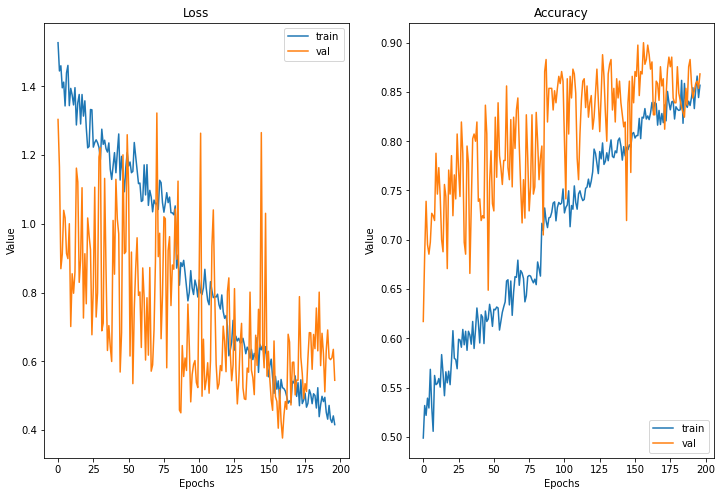

model_3
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 54ms/step - loss: 0.9009 - accuracy: 0.7157 - val_loss: 0.4248 - val_accuracy: 0.8659 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7507 - accuracy: 0.7553 - val_loss: 0.9711 - val_accuracy: 0.7756 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8298 - accuracy: 0.7279 - val_loss: 0.9675 - val_accuracy: 0.7659 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8847 - accuracy: 0.7323 - val_loss: 0.8192 - val_accuracy: 0.8244 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 48ms/step - loss: 0.9383 - accuracy: 0.7005 - val_loss: 0.3986 - val_accuracy: 0.8927 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9677 - accuracy: 0.

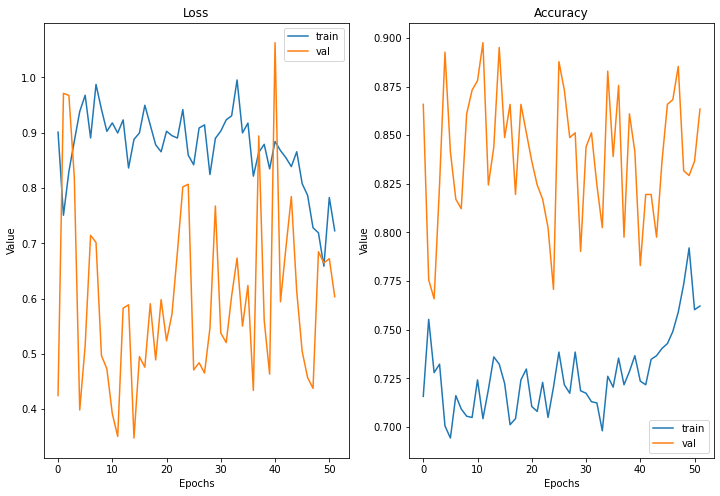

model_4
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 55ms/step - loss: 0.9524 - accuracy: 0.7126 - val_loss: 0.3486 - val_accuracy: 0.8805 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8941 - accuracy: 0.7186 - val_loss: 0.4327 - val_accuracy: 0.8634 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9038 - accuracy: 0.7229 - val_loss: 0.7490 - val_accuracy: 0.8195 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9013 - accuracy: 0.7142 - val_loss: 0.6059 - val_accuracy: 0.8195 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 43ms/step - loss: 0.8741 - accuracy: 0.7360 - val_loss: 0.5277 - val_accuracy: 0.8805 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9209 - accuracy: 0.

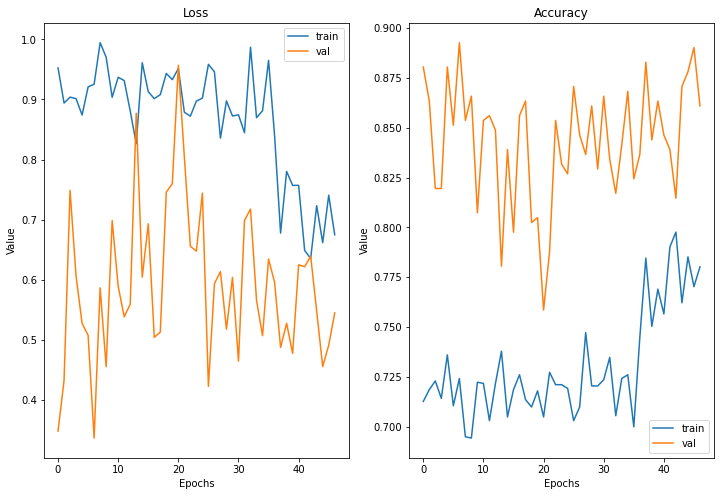

model_5
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 53ms/step - loss: 1.0141 - accuracy: 0.7028 - val_loss: 0.3441 - val_accuracy: 0.8951 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 43ms/step - loss: 0.9029 - accuracy: 0.7161 - val_loss: 0.4821 - val_accuracy: 0.8683 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8714 - accuracy: 0.7341 - val_loss: 0.3979 - val_accuracy: 0.8927 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 47ms/step - loss: 0.9873 - accuracy: 0.7024 - val_loss: 0.3321 - val_accuracy: 0.9024 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9269 - accuracy: 0.7017 - val_loss: 0.4631 - val_accuracy: 0.8683 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9262 - accuracy: 0.

Epoch 53/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7225 - accuracy: 0.7647 - val_loss: 0.4937 - val_accuracy: 0.8683 - lr: 7.0000e-04
Epoch 54/500
51/51 [==============================] - 2s 43ms/step - loss: 0.6650 - accuracy: 0.7796 - val_loss: 0.3079 - val_accuracy: 0.9171 - lr: 7.0000e-04
Epoch 55/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7118 - accuracy: 0.7634 - val_loss: 0.6061 - val_accuracy: 0.8220 - lr: 7.0000e-04
Epoch 56/500
51/51 [==============================] - 2s 44ms/step - loss: 0.6873 - accuracy: 0.7733 - val_loss: 0.4375 - val_accuracy: 0.8780 - lr: 7.0000e-04
Epoch 57/500
51/51 [==============================] - 2s 44ms/step - loss: 0.7509 - accuracy: 0.7653 - val_loss: 0.4021 - val_accuracy: 0.8780 - lr: 7.0000e-04
Epoch 58/500
51/51 [==============================] - 2s 42ms/step - loss: 0.6858 - accuracy: 0.7839 - val_loss: 0.5537 - val_accuracy: 0.8439 - lr: 7.0000e-04
Epoch 59/500
51/51 [====================

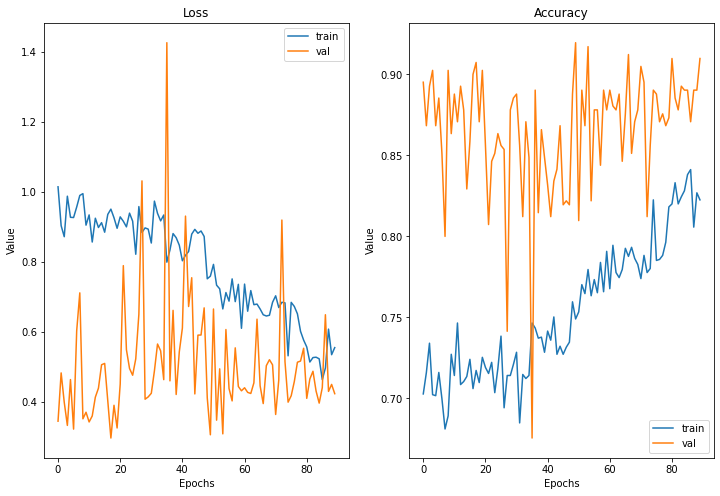

model_6
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 54ms/step - loss: 0.9181 - accuracy: 0.7157 - val_loss: 0.4026 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8700 - accuracy: 0.7217 - val_loss: 0.5977 - val_accuracy: 0.8049 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9066 - accuracy: 0.7210 - val_loss: 0.7944 - val_accuracy: 0.7854 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9209 - accuracy: 0.7223 - val_loss: 0.7128 - val_accuracy: 0.7927 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8663 - accuracy: 0.7273 - val_loss: 0.5074 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.9518 - accuracy: 0.

51/51 [==============================] - 2s 42ms/step - loss: 0.3688 - accuracy: 0.8767 - val_loss: 0.5405 - val_accuracy: 0.8854 - lr: 3.4300e-04
Epoch 104/500
51/51 [==============================] - 2s 43ms/step - loss: 0.3763 - accuracy: 0.8761 - val_loss: 0.6611 - val_accuracy: 0.8585 - lr: 3.4300e-04
Epoch 105/500
51/51 [==============================] - 2s 43ms/step - loss: 0.3708 - accuracy: 0.8842 - val_loss: 0.6126 - val_accuracy: 0.8659 - lr: 3.4300e-04
Epoch 106/500
51/51 [==============================] - 2s 42ms/step - loss: 0.3867 - accuracy: 0.8649 - val_loss: 0.6387 - val_accuracy: 0.8537 - lr: 3.4300e-04
Epoch 107/500
51/51 [==============================] - 2s 42ms/step - loss: 0.3748 - accuracy: 0.8879 - val_loss: 0.6421 - val_accuracy: 0.8537 - lr: 3.4300e-04
Epoch 108/500
51/51 [==============================] - 2s 43ms/step - loss: 0.4085 - accuracy: 0.8680 - val_loss: 0.5915 - val_accuracy: 0.8659 - lr: 3.4300e-04
Epoch 109/500
51/51 [===========================

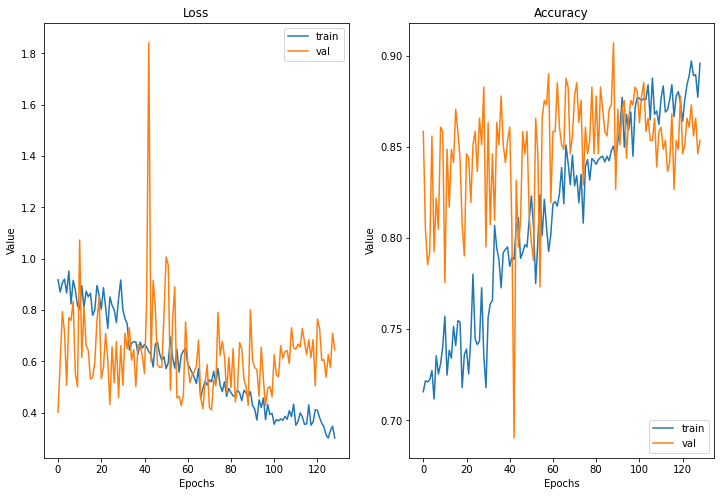

model_7
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 56ms/step - loss: 0.6815 - accuracy: 0.7996 - val_loss: 0.5368 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 46ms/step - loss: 0.8130 - accuracy: 0.7503 - val_loss: 0.5478 - val_accuracy: 0.8366 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 3s 49ms/step - loss: 0.6683 - accuracy: 0.7858 - val_loss: 0.4244 - val_accuracy: 0.8634 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 47ms/step - loss: 0.7333 - accuracy: 0.7796 - val_loss: 0.5531 - val_accuracy: 0.8659 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7476 - accuracy: 0.7721 - val_loss: 0.6827 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 48ms/step - loss: 0.7448 - accuracy: 0.

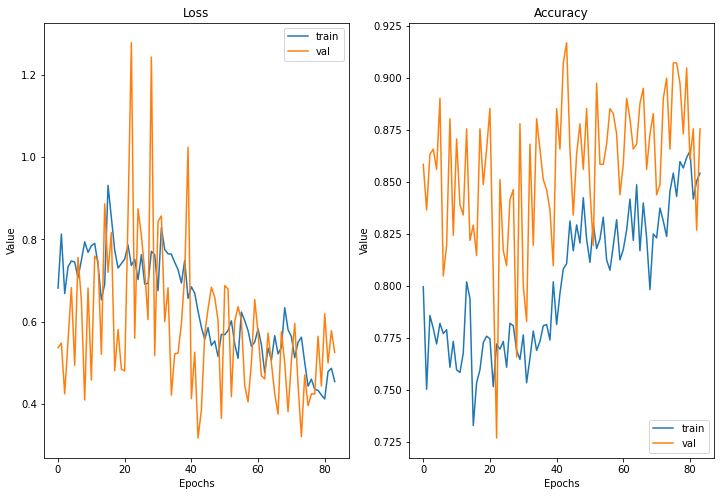

model_8
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 54ms/step - loss: 0.7387 - accuracy: 0.7678 - val_loss: 0.4796 - val_accuracy: 0.8732 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 3s 50ms/step - loss: 0.7424 - accuracy: 0.7790 - val_loss: 0.3810 - val_accuracy: 0.8927 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7170 - accuracy: 0.7920 - val_loss: 0.3829 - val_accuracy: 0.8854 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 47ms/step - loss: 0.7508 - accuracy: 0.7808 - val_loss: 0.3544 - val_accuracy: 0.9049 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7273 - accuracy: 0.7721 - val_loss: 0.5196 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7540 - accuracy: 0.

Epoch 53/500
51/51 [==============================] - 2s 44ms/step - loss: 0.6896 - accuracy: 0.7812 - val_loss: 0.5058 - val_accuracy: 0.8488 - lr: 7.0000e-04
Epoch 54/500
51/51 [==============================] - 2s 44ms/step - loss: 0.6499 - accuracy: 0.7958 - val_loss: 0.5699 - val_accuracy: 0.8780 - lr: 7.0000e-04
Epoch 55/500
51/51 [==============================] - 2s 43ms/step - loss: 0.5823 - accuracy: 0.8151 - val_loss: 0.5930 - val_accuracy: 0.8732 - lr: 7.0000e-04
Epoch 56/500
51/51 [==============================] - 2s 43ms/step - loss: 0.5581 - accuracy: 0.8250 - val_loss: 0.4808 - val_accuracy: 0.8878 - lr: 7.0000e-04
Epoch 57/500
51/51 [==============================] - 2s 43ms/step - loss: 0.5712 - accuracy: 0.8244 - val_loss: 0.4580 - val_accuracy: 0.8829 - lr: 7.0000e-04
Epoch 58/500
51/51 [==============================] - 2s 43ms/step - loss: 0.6041 - accuracy: 0.8200 - val_loss: 0.5414 - val_accuracy: 0.8829 - lr: 7.0000e-04
Epoch 59/500
51/51 [====================

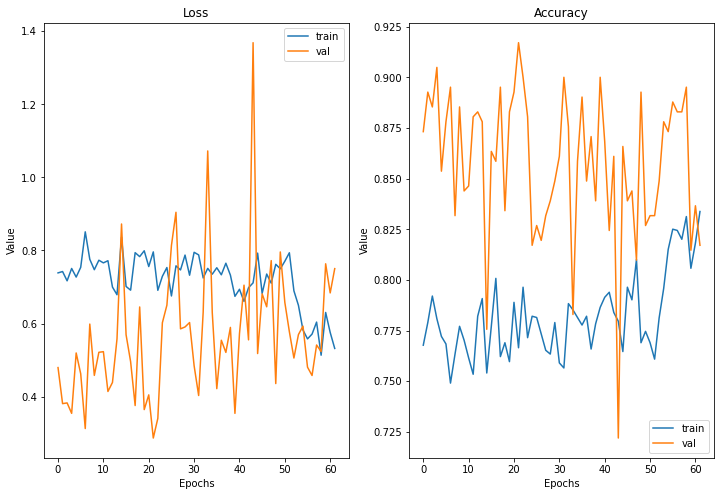

model_9
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 54ms/step - loss: 0.8478 - accuracy: 0.7445 - val_loss: 0.2729 - val_accuracy: 0.9146 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7267 - accuracy: 0.7808 - val_loss: 0.3800 - val_accuracy: 0.9049 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.8135 - accuracy: 0.7646 - val_loss: 0.2839 - val_accuracy: 0.9098 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 48ms/step - loss: 0.7811 - accuracy: 0.7603 - val_loss: 0.2570 - val_accuracy: 0.9244 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 43ms/step - loss: 0.7530 - accuracy: 0.7846 - val_loss: 0.3081 - val_accuracy: 0.9220 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 43ms/step - loss: 0.8011 - accuracy: 0.

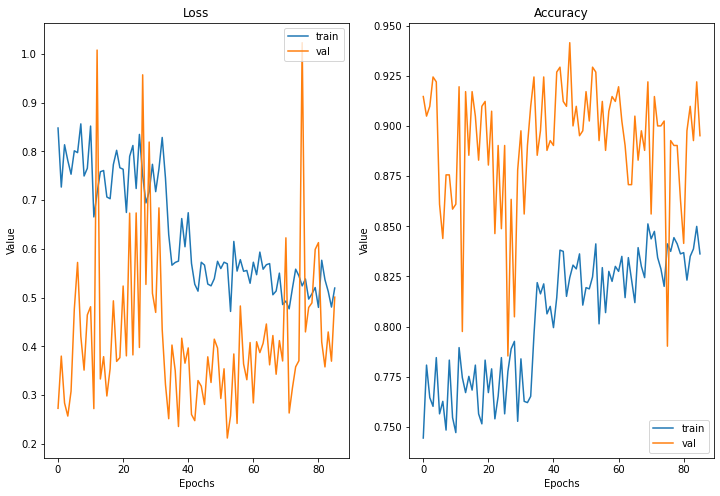

model_10
-------------------------------------------------------------------------------------------------------------------------
Epoch 1/500
51/51 [==============================] - 3s 55ms/step - loss: 0.7007 - accuracy: 0.8100 - val_loss: 0.4957 - val_accuracy: 0.8659 - lr: 0.0010
Epoch 2/500
51/51 [==============================] - 2s 48ms/step - loss: 0.6881 - accuracy: 0.7951 - val_loss: 0.2119 - val_accuracy: 0.9439 - lr: 0.0010
Epoch 3/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7394 - accuracy: 0.7858 - val_loss: 0.2836 - val_accuracy: 0.9268 - lr: 0.0010
Epoch 4/500
51/51 [==============================] - 2s 42ms/step - loss: 0.6961 - accuracy: 0.7852 - val_loss: 0.2981 - val_accuracy: 0.9049 - lr: 0.0010
Epoch 5/500
51/51 [==============================] - 2s 42ms/step - loss: 0.7015 - accuracy: 0.7920 - val_loss: 0.2916 - val_accuracy: 0.9146 - lr: 0.0010
Epoch 6/500
51/51 [==============================] - 2s 42ms/step - loss: 0.6793 - accuracy: 0

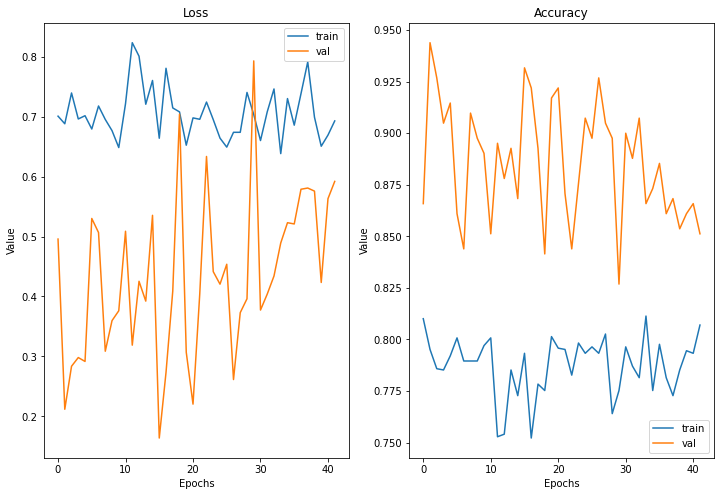

In [29]:
for idx in range(num_model):
    print("model_{}".format(idx+1))
    print("-------------------------------------------------------------------------------------------------------------------------")
    X_train, X_valid, y_train, y_valid = train_test_split(X_trains, y_trains, test_size=0.2, stratify=train['digit'])
    X_train = X_train/255.0
    X_valid = X_valid/255.
    
    model = None
    model = Model(inputs= [input_], outputs=[output])
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(
    lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])
    
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
        "model/channel3_{}.h5".format(idx), save_best_only=True, monitor='val_accuracy', mode='auto')
    
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.7, patience=25)
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 50, restore_best_weights = True)
    
    history = model.fit_generator(datagen.flow(X_train, y_train, shuffle=True, batch_size=batch_size),
                                  epochs=epochs, validation_data=(
                                      X_valid, y_valid),
                                  verbose=1,
                                 steps_per_epoch=X_train.shape[0] // batch_size,
                                  validation_steps=X_valid.shape[0] //batch_size,
                                  callbacks=[checkpoint_cb, early_stopping, lr_scheduler]
                                  )
    plot_curve(history.epoch, history.history, ['loss', 'val_loss', 'accuracy', 'val_accuracy'])

## Predict

In [30]:
X_test = X_test/255.0

In [31]:
best_model_list = []
for i in range(num_model):
    best = tf.keras.models.load_model('model/channel3_{}.h5'.format(i))
    best_model_list.append(best)

In [32]:
result_list = []

for idx, model in enumerate(best_model_list):
    result = model.evaluate(X_valid, y_valid)
    print("model_{}_acc : {}".format(idx+1, result))

13/13 [==============================] - 18s 1s/step - loss: 0.6704 - accuracy: 0.7634
model_1_acc : [0.6704463958740234, 0.7634146213531494]
13/13 [==============================] - 0s 14ms/step - loss: 0.1877 - accuracy: 0.9390
model_2_acc : [0.18765310943126678, 0.9390243887901306]
13/13 [==============================] - 0s 9ms/step - loss: 0.2752 - accuracy: 0.9122
model_3_acc : [0.27515268325805664, 0.9121951460838318]
13/13 [==============================] - 0s 13ms/step - loss: 0.2229 - accuracy: 0.9220
model_4_acc : [0.22286778688430786, 0.9219512343406677]
13/13 [==============================] - 0s 11ms/step - loss: 0.2163 - accuracy: 0.9293
model_5_acc : [0.2163187861442566, 0.9292683005332947]
13/13 [==============================] - 0s 11ms/step - loss: 0.1292 - accuracy: 0.9634
model_6_acc : [0.12915080785751343, 0.9634146094322205]
13/13 [==============================] - 0s 11ms/step - loss: 0.1909 - accuracy: 0.9561
model_7_acc : [0.19091743230819702, 0.95609754323959

In [33]:
pred_list = []
for idx, model in enumerate(best_model_list):
    pred = model.predict(X_test)
    pred_list.append(pred)

In [34]:
len(pred_list[0][0])

10

In [35]:
final_pred = np.array([0]*204800).reshape(20480, 10).astype('float64')
for pred in pred_list:
    final_pred += pred
final_pred = np.argmax(final_pred, axis=1)

In [36]:
final_pred

array([6, 9, 8, ..., 6, 8, 0])

In [37]:
submission['digit'] = final_pred

In [38]:
submission

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3
...,...,...
20475,22524,4
20476,22525,1
20477,22526,6
20478,22527,8


In [39]:
submission.to_csv('./submission/rexnet_ensemble_channel3_submission.csv', index=False)